<a href="https://colab.research.google.com/github/ki4rex/srussell149/blob/master/TensorFlow_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Basic Code


TensorFlow version: 2.18.0
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


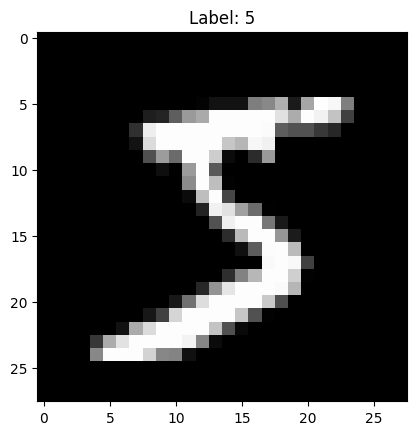

Reshaped training data shape: (60000, 28, 28, 1)
Reshaped test data shape: (10000, 28, 28, 1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 33ms/step - accuracy: 0.9027 - loss: 0.3250 - val_accuracy: 0.9850 - val_loss: 0.0489
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.9839 - loss: 0.0519 - val_accuracy: 0.9867 - val_loss: 0.0410
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9891 - loss: 0.0327 - val_accuracy: 0.9905 - val_loss: 0.0309
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 28ms/step - accuracy: 0.9919 - loss: 0.0239 - val_accuracy: 0.9907 - val_loss: 0.0286
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 29ms/step - accuracy: 0.9947 - loss: 0.0167 - val_accuracy: 0.9897 - val_loss: 0.0322
313/313 - 2s - 8ms/step - accuracy: 0.9897 - loss: 0.0322

Test accuracy: 0.9897000193595886


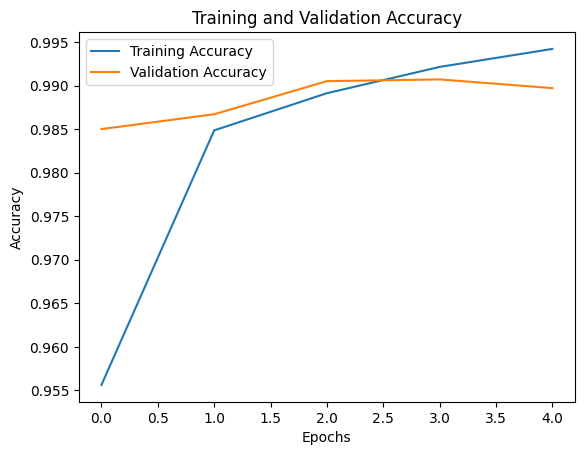

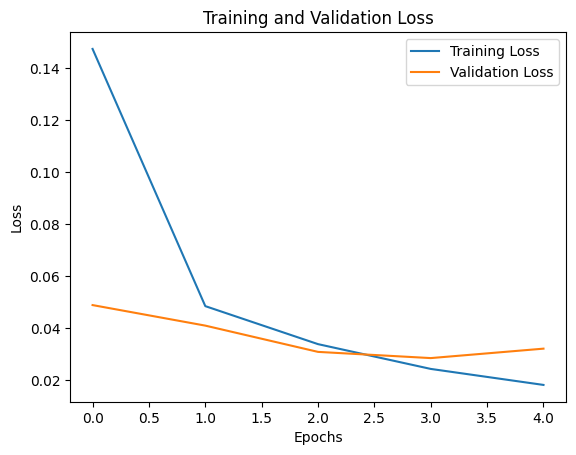

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


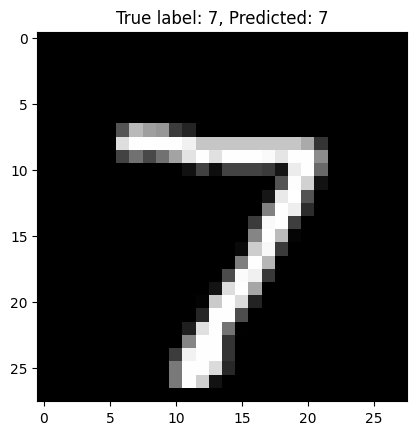

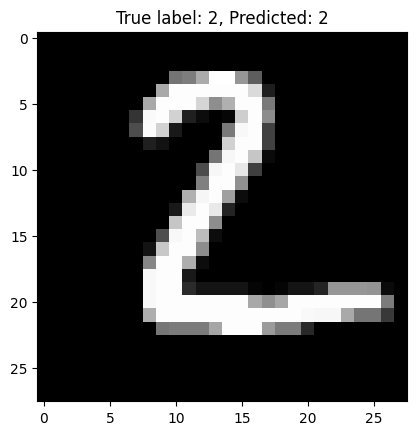

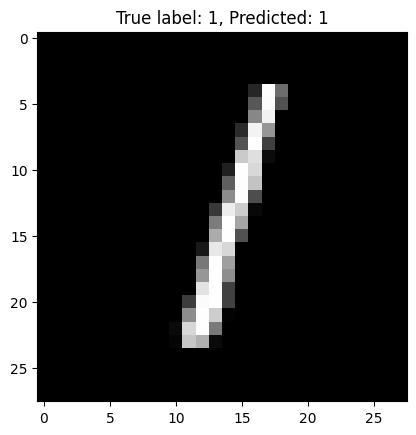

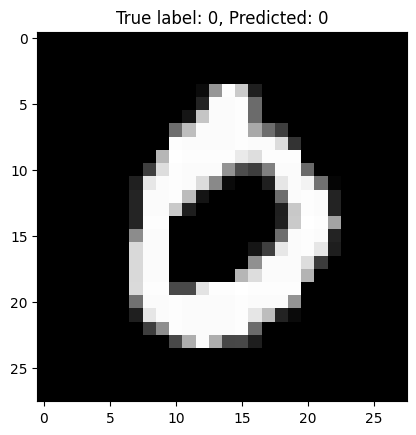

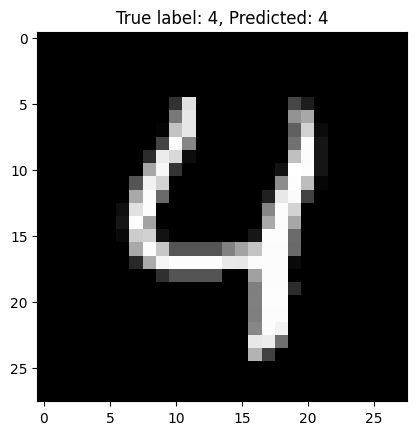

In [8]:
# Code Author = Ryan Russell
# Based off of example code form the book Essentials of AI for Beginners By Melissa Peneycad

# Import TensorFlow and other required libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Verify TensorFlow version
print("TensorFlow version:", tf.__version__)

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

#Print the shape of the dataset
print(f"Training data shape: {train_images.shape}")
print(f"Test data shape: {test_images.shape}")

#Display the first image in the training set
plt.imshow(train_images[0], cmap='gray')
plt.title(f"Label: {train_labels[0]}")
plt.show()

# Normalize the images to values between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape the data to add a channel dimension (for grayscale)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))
# Verify the preprocessing
print(f"Reshaped training data shape: {train_images.shape}")
print(f"Reshaped test data shape: {test_images.shape}")

# Build the model
model=models.Sequential([
  layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
  layers.MaxPooling2D((2,2)),
  layers.Conv2D(64,(3,3),activation='relu'),
  layers.MaxPooling2D((2,2)),
  layers.Flatten(),
  layers.Dense(64,activation='relu'),
  layers.Dense(10,activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
      loss='sparse_categorical_crossentropy',
      metrics=['accuracy'])

# Train the model
history=model.fit(train_images,train_labels,epochs=5,validation_data=(test_images,test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest accuracy: {test_acc}")   # removed .4F after test_acc

# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions on the test set
predictions = model.predict(test_images)

# Display a few test images along with their predicted labels
for i in range(5):
  plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
  plt.title(f"True label: {test_labels[i]}, Predicted: {tf.argmax(predictions[i]).numpy()}")
  plt.show()



NOTES:
1. The MNIST dataset is readily available in TensorFlow, making it easy to access and use. It’s loaded directly from TensorFlow’s ‘tensorflow.keras.datasets’ module. The MNIST dataset contains 70,000 images of handwritten digits divided into training and test sets; the former includes 60,000 images, and the latter contains 10,000. Each image in the dataset is a 28x28 pixel greyscale image (784 pixels in total), with each pixel ranging from 0 (black) to 255 (white) with various shades of grey in between. Think of this as the “content” of each image.
2. Viewing and interpreting the model’s outputs. Once the neural network has been built and trained and its predictions made, you will see a final output that includes two charts and several greyscale images showing the accuracy of the predictions made for different digits.  The top chart shows Training and Validation Accuracy, and the bottom chart shows Training and Validation Loss (bottom), displayed as outputs. plt.title(f"True label: {test_labels[i]}, Predicted: {tf.argmax(predictions[i]).numpy()}") plt.show() 33   In the training and validation accuracy loss chart, the Training Accuracy line shows how well the model performs on the training data. In contrast, the Validation Accuracy line shows its performance on unseen test data after each epoch. The X-axis represents the number of epochs (the number of times the model has seen the whole dataset), and the Y- axis shows accuracy as a percentage. In this chart, the training accuracy starts lower but quickly rises to about 99.5% by the 5th epoch. Validation accuracy starts high and steadily improves, reaching 99.1% by the 5th epoch. These results show the model is performing well on both sets, and the close alignment suggests good generalization, meaning it’s likely to perform well on new data without overfitting.  In the training and validation loss chart, the Training Loss line represents the error on the training data after each epoch, while the Validation Loss line shows the error on the test data. The X-axis indicates the number of epochs, and the Y-axis shows the loss value, with lower values meaning better performance. In this example, the training loss steadily decreases, showing the model is improving on the training data. The validation loss decreases initially but fluctuates slightly, hinting at possible overfitting. However, the overall trend remains stable, which is a positive sign.

